In [3]:
import py_neuromodulation as pn
from py_neuromodulation import nm_BidsStream, nm_analysis
from sklearn import linear_model, metrics, model_selection
import os

In [45]:
RUN_NAME = "sub-testsub_ses-EphysMedOff_task-buttonpress_run-0"
PATH_RUN = os.path.join(
    os.path.abspath(os.path.join("examples", "data")),
    "sub-testsub",
    "ses-EphysMedOff",
    "ieeg",
    RUN_NAME,
)
PATH_BIDS = os.path.abspath(os.path.join("examples", "data"))
PATH_OUT = os.path.abspath(os.path.join("examples", "data", "derivatives"))

In [46]:
nm_BIDS = nm_BidsStream.BidsStream(
    PATH_RUN=PATH_RUN,
    PATH_BIDS=PATH_BIDS,
    PATH_OUT=PATH_OUT,
    LIMIT_DATA=False,
    VERBOSE=True,
    target_keywords=("SQUARED_ROTATION",),
    used_types=("ecog", "seeg"),
)

Extracting parameters from c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_channels.tsv.
Reading in coordinate system frame MNI152NLin2009bAsym: None.
Reading electrode coords from c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_acq-StimOff_space-mni_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['ECOG_L_1_SMC_AT', 'ECOG_L_2_SMC_AT', 'ECOG_L_3_SMC_AT', 'ECOG_L_4_SMC_AT', 'ECOG_L_5_SMC_AT', 'ECOG_L_6_SMC_AT', 'LFP_L_234_STN_BS', 'LFP_L_567_STN_BS', 'LFP_L_1_STN_BS', 'LFP_L_234_STN_BS', 'LFP_L_567_STN_BS', 'LFP_R_234_STN_BS', 'LFP_R_567_STN_BS', 'ANALOG_ROT_R_1']), ('x', ['-47', '-46', '-4

c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:44: RuntimeWarning: Did not find any events.tsv associated with sub-testsub_ses-EphysMedOff_task-buttonpress_run-0.

The search_str was "c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\**\sub-testsub_ses-EphysMedOff*events.tsv"
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:44: RuntimeWarning: iEEG Coordinate frame MNI152NLin2009bAsym is not a readable BIDS keyword by mne-bids yet. The allowed keywords are: ['ACPC', 'Pixels', 'Other']
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:44: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:44: RuntimeWarning: Fiducial p

In [47]:
nm_BIDS.nm_channels

,name,rereference,used,target,type,status,new_name
0,ANALOG_R_ROTA_CH,None,0,0,misc,good,ANALOG_R_ROTA_CH
1,ECOG_L_1_SMC_AT,average,1,0,ecog,good,ECOG_L_1_SMC_AT-avgref
2,ECOG_L_2_SMC_AT,average,1,0,ecog,good,ECOG_L_2_SMC_AT-avgref
3,ECOG_L_3_SMC_AT,average,1,0,ecog,good,ECOG_L_3_SMC_AT-avgref
4,ECOG_L_4_SMC_AT,average,1,0,ecog,good,ECOG_L_4_SMC_AT-avgref
5,ECOG_L_5_SMC_AT,average,1,0,ecog,good,ECOG_L_5_SMC_AT-avgref
6,ECOG_L_6_SMC_AT,average,1,0,ecog,good,ECOG_L_6_SMC_AT-avgref
7,EEG_AO,None,0,0,misc,good,EEG_AO
8,LFP_L_1_STN_BS,LFP_L_567_STN_BS,1,0,seeg,good,LFP_L_1_STN_BS-LFP_L_567_STN_BS
9,LFP_L_234_STN_BS,LFP_L_1_STN_BS,1,0,seeg,good,LFP_L_234_STN_BS-LFP_L_1_STN_BS


In [48]:
nm_BIDS.settings

{'out_path': 'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\rt_example',
 'sampling_rate_features': 10,
 'methods': {'raw_resampling': True,
  'raw_normalization': False,
  'feature_normalization': True,
  'kalman_filter': False,
  're_referencing': True,
  'notch_filter': True,
  'bandpass_filter': False,
  'stft': False,
  'fft': True,
  'raw_hjorth': True,
  'sharpwave_analysis': False,
  'return_raw': True,
  'project_cortex': False,
  'project_subcortex': False,
  'coherence': False,
  'fooof': False},
 'raw_resampling_settings': {'resample_freq': 1000},
 'raw_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'kalman_filter_settings': {'Tp': 0.1,
  'sigma_w': 0.7,
  'sigma_v': 1,
  'frequency_bands': ['theta',
   'alpha',
   'low beta',
   'high beta',
   'low gamma',
   'high gamma',
   'HFA']},
 'stf

In [49]:
nm_BIDS.run_bids()

No Error occurred when testing the settings.
No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 7.50 Hz
- Upper transition bandwidth: 7.50 Hz
- Filter length: 999 samples (0.999 sec)

Last batch took: 0.02 seconds
1.0 seconds of data processed
Last batch took: 0.02 seconds
1.1 seconds of data processed
Last batch took: 0.02 seconds
1.2 seconds of data processed
Last batch took: 0.02 seconds
1.3 seconds of data processed
Last batch took: 0.02 seconds
1.4 seconds of data processed
Last batch took: 0.02 seconds
1.5 seconds of data processed
Last batch took: 0.02 seconds
1.6 seconds of data processed
Last batch took: 0.02 seconds
1.7 seconds of 

In [50]:
nm_BIDS.feature_arr

,ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,ECOG_L_1_SMC_AT-avgref_raw,ECOG_L_1_SMC_AT-avgref_fft_theta,ECOG_L_1_SMC_AT-avgref_fft_alpha,ECOG_L_1_SMC_AT-avgref_fft_low beta,ECOG_L_1_SMC_AT-avgref_fft_high beta,ECOG_L_1_SMC_AT-avgref_fft_low gamma,ECOG_L_1_SMC_AT-avgref_fft_high gamma,...,LFP_R_567_STN_BS-LFP_R_234_STN_BS_raw,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_theta,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_alpha,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_low beta,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_high beta,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_low gamma,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_high gamma,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_HFA,time,SQUARED_ROTATION
0,554.538409,0.119505,10.325938,-16.160959,8.380809,8.360830,7.525726,6.930409,5.087405,4.290047,...,-30.854981,5.668820,6.451132,5.517121,5.827360,4.465185,4.104390,3.989579,1000.0,0.0
1,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1100.0,0.0
2,-1.331624,1.408613,-1.383964,-0.548407,-1.229363,-1.376711,0.992956,-0.517510,-0.744162,1.344446,...,1.414153,-0.835965,-1.308469,0.882165,-1.192456,0.920176,1.370469,1.215396,1200.0,0.0
3,-1.425783,0.699040,1.214056,0.740696,-1.305021,-0.228057,-1.058874,-1.726530,0.315289,-1.097908,...,0.866808,-1.284480,-1.070194,-1.045056,-0.312701,-0.286147,0.359548,-1.171210,1300.0,0.0
4,-1.209124,0.744959,0.772673,0.243203,-0.934284,1.336412,-0.968166,-1.234501,1.953975,1.312390,...,1.851555,0.348413,-0.468931,0.818880,0.067299,1.637273,0.705584,0.388765,1400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.675103,-0.484583,-0.479560,-1.325230,0.235046,0.510633,1.447847,1.159229,2.334196,3.000000,...,0.033291,0.833449,0.301668,0.601015,0.390752,1.334445,1.366612,-0.280104,17500.0,0.0
166,1.178222,-0.794486,-0.189494,2.552827,0.737183,0.415137,2.165695,1.040787,0.417422,0.108702,...,-0.738853,0.117806,-0.341766,-0.241607,0.884254,1.154601,0.246271,-0.724712,17600.0,0.0
167,1.093560,-0.816235,0.041568,-0.350382,1.233235,0.462539,1.807908,0.854213,-0.269616,-0.357576,...,-0.643795,-0.263129,-0.461748,-0.704136,0.751181,1.675290,0.761213,-0.491735,17700.0,0.0
168,2.036158,-1.253024,0.491240,1.234930,1.844836,1.247588,1.679908,1.186340,-0.040862,-0.601789,...,-1.420351,-0.257488,-0.349844,-0.516520,1.117833,1.609586,0.305068,0.020600,17800.0,0.0


In [51]:
nm_BIDS.feature_arr.describe()

,ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,ECOG_L_1_SMC_AT-avgref_raw,ECOG_L_1_SMC_AT-avgref_fft_theta,ECOG_L_1_SMC_AT-avgref_fft_alpha,ECOG_L_1_SMC_AT-avgref_fft_low beta,ECOG_L_1_SMC_AT-avgref_fft_high beta,ECOG_L_1_SMC_AT-avgref_fft_low gamma,ECOG_L_1_SMC_AT-avgref_fft_high gamma,...,LFP_R_567_STN_BS-LFP_R_234_STN_BS_raw,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_theta,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_alpha,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_low beta,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_high beta,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_low gamma,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_high gamma,LFP_R_567_STN_BS-LFP_R_234_STN_BS_fft_HFA,time,SQUARED_ROTATION
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,3.055730,0.284230,-0.263237,0.247217,-0.099923,-0.165083,-0.135602,0.078368,0.050452,-0.091178,...,-0.129268,0.290320,-0.152941,0.333897,-0.012195,0.252333,0.287494,0.061026,9450.000000,0.111765
std,42.558082,1.023205,1.219153,1.645048,1.201818,1.174293,1.271678,1.219941,1.128475,1.050389,...,2.571257,1.013090,1.140282,1.003823,1.085861,1.050678,1.027408,1.178638,4921.889881,0.316008
min,-2.020715,-1.699468,-2.407077,-16.160959,-2.590237,-2.334456,-3.000000,-2.284248,-3.000000,-1.698823,...,-30.854981,-1.653336,-2.679429,-1.594567,-2.716688,-3.000000,-2.044392,-2.908299,1000.000000,0.000000
25%,-0.959152,-0.492496,-0.880339,-0.376895,-0.953338,-0.934862,-1.040353,-0.827879,-0.641073,-0.821137,...,-0.695126,-0.396103,-0.846313,-0.320118,-0.519241,-0.431543,-0.394355,-0.800352,5225.000000,0.000000
50%,-0.509268,0.301069,-0.411693,0.440352,-0.196980,-0.070212,-0.267391,0.013587,-0.030814,-0.346912,...,0.010685,0.264320,-0.264798,0.313280,0.231040,0.359113,0.174156,0.097294,9450.000000,0.000000
75%,0.534492,0.911826,0.226891,0.997088,0.736672,0.531397,0.741737,0.941436,0.739868,0.375756,...,0.779609,1.108828,0.550019,0.947311,0.623317,1.004747,0.973611,0.991370,13675.000000,0.000000
max,554.538409,3.000000,10.325938,2.816133,8.380809,8.360830,7.525726,6.930409,5.087405,4.290047,...,2.483154,5.668820,6.451132,5.517121,5.827360,4.465185,4.104390,3.989579,17900.000000,1.000000


In [52]:
file_name = os.path.basename(PATH_RUN)
file_name

'sub-testsub_ses-EphysMedOff_task-buttonpress_run-0'

In [53]:
feature_reader = nm_analysis.Feature_Reader(
        feature_dir=PATH_OUT,
        feature_file=file_name
)

In [54]:
ch_used = feature_reader.nm_channels.query('(type=="ecog") and (used == 1)').iloc[
    0
]["name"]
feature_used = "stft" if feature_reader.settings["methods"]["stft"] else "fft"

Feature epoch average figure saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0\MOV_aligned_features_ch_ECOG_L_1_SMC_AT_fft.png


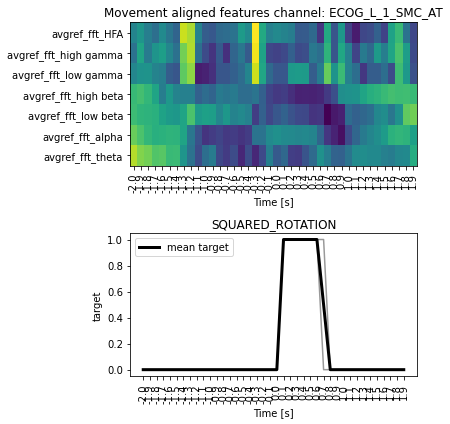

In [55]:
feature_reader.plot_target_averaged_channel(
        ch=ch_used, list_feature_keywords=[feature_used], epoch_len=4, threshold=0.5
    )

In [56]:
 model = linear_model.LogisticRegression(class_weight='balanced')

In [57]:
feature_reader.feature_arr.shape

(170, 123)

In [58]:
feature_reader.set_decoder(
        model = model,
        eval_method=metrics.balanced_accuracy_score,
        cv_method=model_selection.KFold(n_splits=3, shuffle=True),
        get_movement_detection_rate=True,
        min_consequent_count=2
    )

In [60]:
performances = feature_reader.run_ML_model(
        estimate_channels=True,
        estimate_gridpoints=False,
        estimate_all_channels_combined=False,
        save_results=True
    )

model being saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_LM_ML_RES.p


In [61]:
performances

{'testsub': {'ECOG_L_1_SMC_AT-avgref': {'coord': [-47.0, -26.0, 65.0],
   'performance_test': 0.8504575163398692,
   'performance_train': 0.9437458745874587,
   'mov_detection_rates_test': 0.8333333333333334,
   'mov_detection_rates_train': 1.0,
   'fprate_test': 0.13241830065359475,
   'fprate_train': 0.11250825082508249,
   'tprate_test': 0.8333333333333334,
   'tprate_train': 1.0},
  'ECOG_L_2_SMC_AT-avgref': {'coord': [-46.0, -15.5, 63.0],
   'performance_test': 0.9125293818690045,
   'performance_train': 0.9833346769674245,
   'mov_detection_rates_test': 0.8888888888888888,
   'mov_detection_rates_train': 1.0,
   'fprate_test': 0.06383012515087987,
   'fprate_train': 0.033330646065151175,
   'tprate_test': 0.8888888888888888,
   'tprate_train': 1.0},
  'ECOG_L_3_SMC_AT-avgref': {'coord': [-45.5, -5.5, 60.5],
   'performance_test': 0.9490879685207417,
   'performance_train': 0.986764705882353,
   'mov_detection_rates_test': 1.0,
   'mov_detection_rates_train': 1.0,
   'fprate_test'

Feature epoch average figure saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\PLOT_CORTEX_ch_performance_allch_allgrid.png


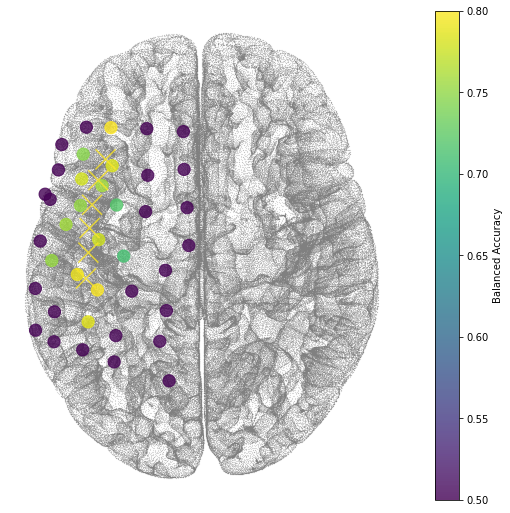

In [17]:
feature_reader.plot_subject_grid_ch_performance(performance_dict=performances, plt_grid=True)